<a href="https://colab.research.google.com/github/nlreiser/MSDS-Machine-Learning/blob/main/M3_Reiser_HousePrices_Models_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices: EDA (Kaggle) for MSDS 422 

## Ingest

In [240]:
# Import modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.stats.outliers_influence as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error

#py.test --nbval Reiser_M1_House_Prices.ipynb

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [241]:
#Set display to max rows/columns to view all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

*House Prices Data from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)*

In [242]:
# Import test and train datasets
house_test = pd.read_csv('https://raw.githubusercontent.com/nlreiser/MSDS-Machine-Learning/main/Datasets/test.csv')
house_train = pd.read_csv('https://raw.githubusercontent.com/nlreiser/MSDS-Machine-Learning/main/Datasets/train.csv')

# View first lines of training data
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [243]:
house_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [244]:
# View first lines of test data
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [245]:
house_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [246]:
#Determine shape of the training data
house_train.shape

(1460, 81)

In [247]:
#Determine shape of the test data
house_test.shape

(1459, 80)

## EDA

In [248]:
# Drop SalePrice from training data
train = house_train.drop('SalePrice', axis=1)

# Combine train and test data
data = [train, house_test]
df_train = pd.concat(data)
df_train.shape

(2919, 80)

In [249]:
# Get preliminary descriptive statistics about the data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [250]:
#Retrieve information about the quant/qual variables in the data and if there are any null values in the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [251]:
#Check for any duplicate rows 
duplicate_rows = df_train[df_train.duplicated()]
duplicate_rows.shape

(0, 80)

In [252]:
#Create quantitative and qualitative independent variable sets
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

#Check number of each variable type
print("Number of Numerical features: ", len(quantitative))
print("Number of Categorical features: ", len(qualitative))

Number of Numerical features:  36
Number of Categorical features:  43


There are 81 variables in the data, including Id and SalePrice. 36 variables are quantitative (numerical) and 43 variables are qualitative (categorical). Object datatypes are put in the qualitative bucket and non-object datatypes are put into the quantitative bucket for further analysis. 

###Feature Creation

In [253]:
#To reduce the number of variables, total bathrooms will be added (full and half bathrooms will be separate).
df_train['Baths'] = df_train['BsmtFullBath'] + df_train['FullBath'] 
df_train['HalfBaths'] = df_train['BsmtHalfBath'] + df_train['HalfBath']
df_train['Baths'].value_counts()

2.0    1466
1.0     757
3.0     644
4.0      44
6.0       5
0.0       1
Name: Baths, dtype: int64

In [254]:
df_train['HalfBaths'].value_counts()

0.0    1699
1.0    1153
2.0      61
3.0       3
4.0       1
Name: HalfBaths, dtype: int64

In [255]:
#Quantitatively add bathroom (full bathroom are one's place, half bathrooms are tenth's place)
df_train['TotalBaths_Full.Half'] = df_train['Baths'] + 0.1*(df_train['HalfBaths'])
df_train['TotalBaths_Full.Half'].value_counts()

2.0    881
2.1    556
1.0    442
3.0    349
1.1    293
3.1    288
2.2     29
4.0     25
1.2     20
4.1     16
3.2      6
4.2      3
6.2      3
1.3      2
6.0      2
3.3      1
0.4      1
Name: TotalBaths_Full.Half, dtype: int64

In [256]:
#Incase more detail is needed, explanation for each bathroom addition is added
df_train['TotalBaths'] = df_train['Baths'].map(str) + 'Full,' + df_train['HalfBaths'].map(str) + 'Half'
df_train['TotalBaths'].value_counts()

2.0Full,0.0Half    881
2.0Full,1.0Half    556
1.0Full,0.0Half    442
3.0Full,0.0Half    349
1.0Full,1.0Half    293
3.0Full,1.0Half    288
2.0Full,2.0Half     29
4.0Full,0.0Half     25
1.0Full,2.0Half     20
4.0Full,1.0Half     16
3.0Full,2.0Half      6
4.0Full,2.0Half      3
6.0Full,2.0Half      3
1.0Full,3.0Half      2
6.0Full,0.0Half      2
nanFull,nanHalf      2
3.0Full,3.0Half      1
0.0Full,4.0Half      1
Name: TotalBaths, dtype: int64

In [257]:
#Drop bath columns that are no longer needed 
df_train = df_train.drop(['Baths', 'HalfBaths', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotalBaths_Full.Half'], axis=1)

In [258]:
#Check that columns have been dropped
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

In [259]:
#To further reduce number of variables, square footage will be totaled (garage not included)
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['GrLivArea']

In [260]:
#Drop area columns that are no longer needed 
df_train = df_train.drop(['TotalBsmtSF', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1)

In [261]:
#Check that columns have been dropped
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType',

In [262]:
#To further reduce number of variables, total deck and porch square footage is calculated
df_train['Deck_PorchSF'] = df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']

Having a deck or porch does not have a very strong correlation with SalePrice compared to other features. To further reduce the number of variables, the individual square footage will be dropped and the total Deck_PorchSF will be kept. 

In [263]:
#Drop area columns that are no longer needed 
df_train = df_train.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)

In [264]:
#Check that columns have been dropped
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'TotalBaths', 'TotalSF',
       'Deck_PorchSF'],
      dtype='o

In [265]:
df_train['QualxSF'] = df_train['OverallQual'] * df_train['TotalSF']

In [266]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'TotalBaths', 'TotalSF',
       'Deck_PorchSF', 'QualxSF'],
   

###Target Variable Distribution: SalePrice

In [267]:
#Get descriptive statistics on the SalePrice
house_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

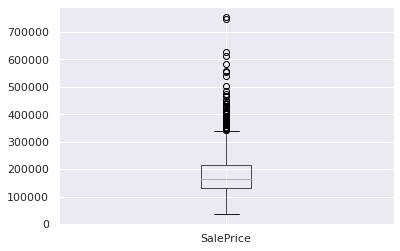

In [268]:
#Create a boxplot of SalePrice to view spread of the costs of houses
house_train.boxplot(column=['SalePrice'])

Skewness: 1.882876
Kurtosis: 6.536282


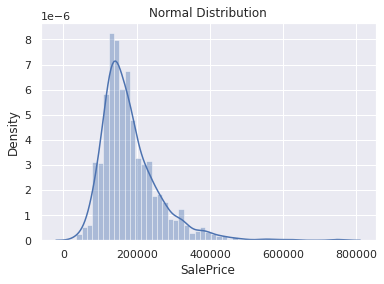

In [269]:
#Plot distribution of SalePrice
sns.distplot(house_train['SalePrice'])
plt.title('Normal Distribution')
#Find skewness and kurtosis 
print("Skewness: %f" % house_train['SalePrice'].skew())
print("Kurtosis: %f" % house_train['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


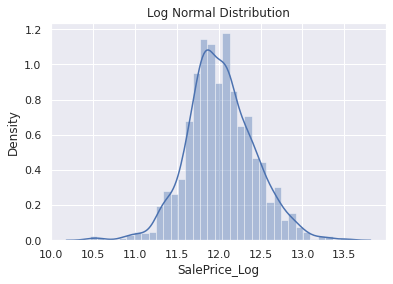

In [270]:
#The plot of SalePrice is not normally distributed - right skewed 
#Transform SalePrice data to log scale to see if it improves the distribution
house_train['SalePrice_Log']=np.log(house_train['SalePrice'])

#View the new distribution plot of SalePrice after log transformation
sns.distplot(house_train['SalePrice_Log'])
plt.title('Log Normal Distribution')
#Find skewness and kurtosis
print("Skewness: %f" % house_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % house_train['SalePrice_Log'].kurt())

### Null Values - Missing Features

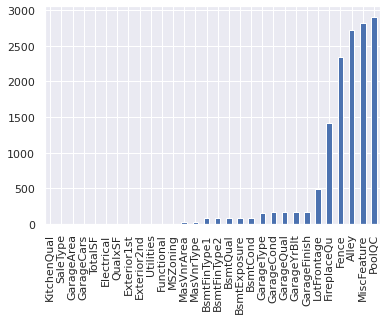

In [271]:
#Find where the null values exist in the training dataset by plotting the counts per variable 
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

29 independent variables have null values. From reading the data description we find that the null values are features that the houses do not have (for example no pool, no basement, etc.) rather than absent data. Columns with more than half of the data as null values will be dropped.

In [272]:
#Drop variables with >50% null values
df_train = df_train.drop(['Fence','Alley','MiscFeature','PoolQC'], axis=1)
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'TotalBaths', 'TotalSF', 'Deck_PorchSF', 'QualxSF'],
      dtype='object')

In [273]:
#Rerun quantitative and qualitative independent variable sets
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

#Check number of each variable type
print("Number of Numerical features: ", len(quantitative))
print("Number of Categorical features: ", len(qualitative))

Number of Numerical features:  22
Number of Categorical features:  40


In [274]:
#Replace null values with value 'Missing' for qualitative data
for c in qualitative:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['Missing'])
        df_train[c] = df_train[c].fillna('Missing')

In [275]:
#Replace null values with median for quantitative data
df_train.fillna(df_train.median(), inplace=True)

### Independent Variable Distributions

In [276]:
#Test if any of the quantitative variables follow a normal distribution
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df_train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


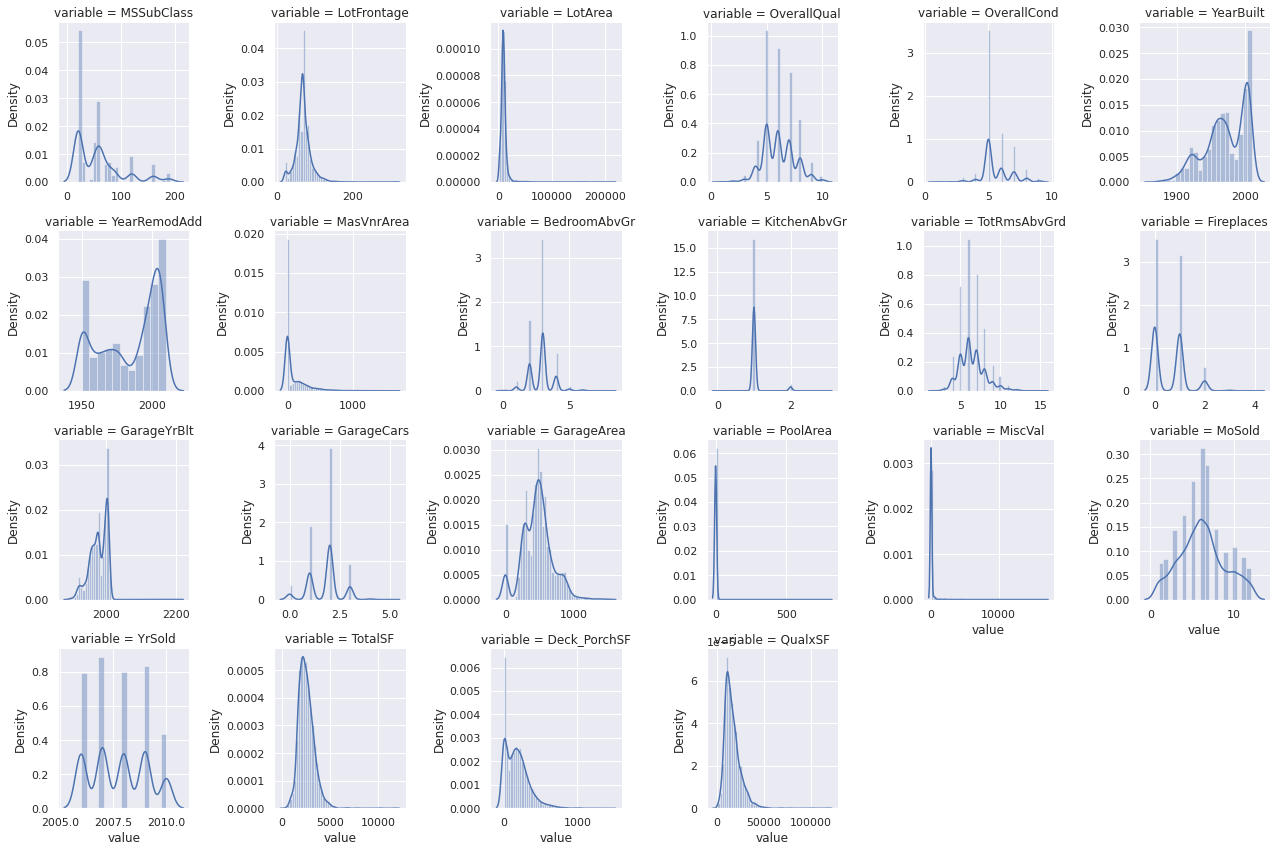

In [277]:
f = pd.melt(df_train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [278]:
#Plot histograms of quantitative features 
#df_train[quantitative].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

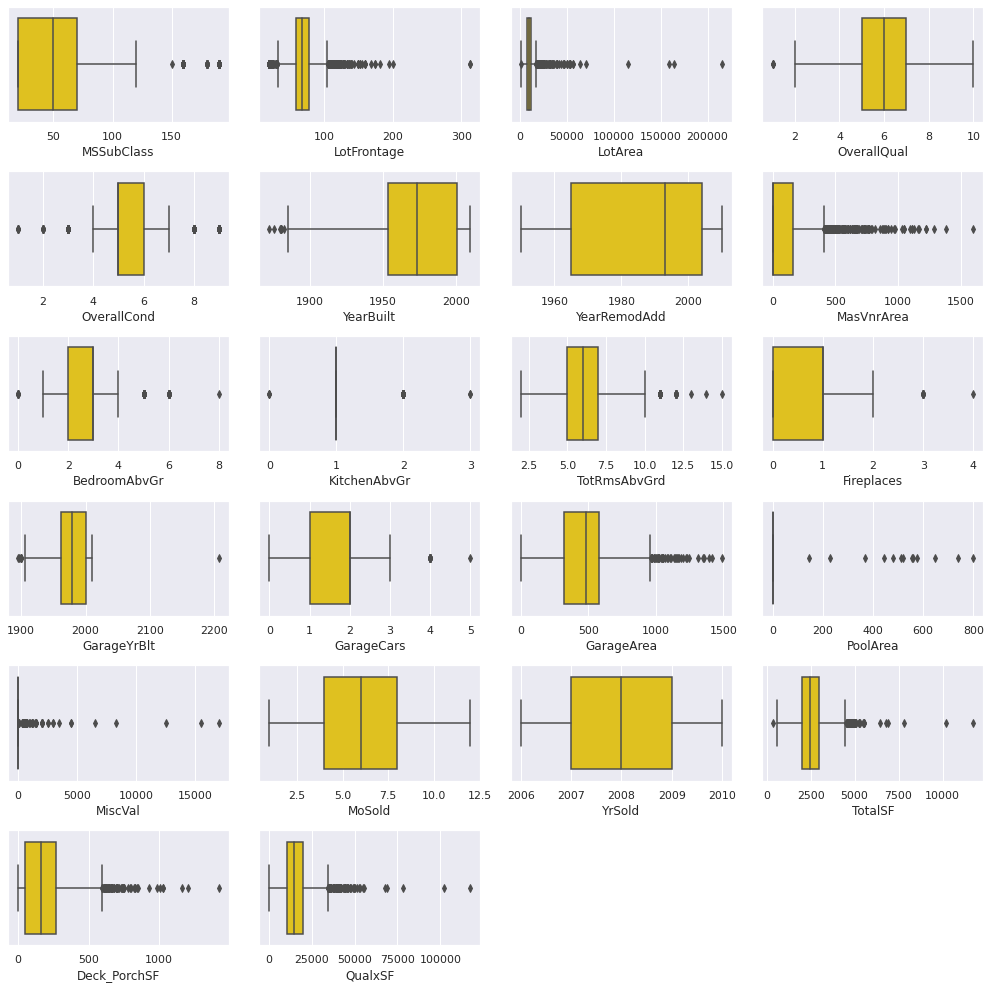

In [279]:
#Plot boxplots to determine quartiles and outliers for quantitative variables
sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,50))

a=len(quantitative)   # No. of rows in subplot
b=4                        # No. of plots in each row
c=1                        # Figure Counter

data=df_train.copy()  # Making a dataset copy

for features in quantitative:
    plt.subplot(a,b,c)
    sns.boxplot(x = data[features], color = 'gold')  # To check for outliers
    c = c + 1  # Incrementing figure counter
     

fig.tight_layout()
plt.show()

In [280]:
#Find skewness and kurtosis of quantitative variables
skew = df_train[quantitative].skew()
kurt = df_train[quantitative].kurt()
skew_kurt = pd.DataFrame()
skew_kurt['Skewness'] = skew
skew_kurt['Kurtosis'] = kurt
skew_kurt

,Skewness,Kurtosis
MSSubClass,1.376165,1.457827
LotFrontage,1.675713,14.197031
LotArea,12.829025,264.952310
OverallQual,0.197212,0.067219
OverallCond,0.570605,1.479447
YearBuilt,-0.600114,-0.511317
YearRemodAdd,-0.451252,-1.346431
MasVnrArea,2.614936,9.336415
BedroomAbvGr,0.326492,1.941404
KitchenAbvGr,4.304467,19.777937


Quantitative variables that may have better distribution after log transformation include: LotArea, KitchenAbvGr, PoolArea, and MiscVal. Other variables may impact the price if they are missing, such as no second floor or no garage.

The qualitative variables have varying impact on the price of the home. Neighborhood impacts the cost of the home, as does having more or less bathrooms. Certain features around the home can raise or lower the cost, for example living near a park can increase the value, while being near a main road may lower the value. Having a kitchen in excellent quality increases the value of the home, as does having a pool in excellent quality. The most expensive homes are partially completed when they are assessed. 

###Categorical Data Encoding

In [281]:
# Encode ordinal data to link each ordinal variable type to a number (from qualitative data)
ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
ord_enc = OrdinalEncoder()
X = [['Missing', 5],['TA', 4],['Po', 3],['Gd', 2],['Fa', 1],['Ex', 0]]
result = ord_enc.fit_transform(df_train[ordinal])
print(result)

[[2. 4. 2. ... 3. 5. 5.]
 [3. 4. 2. ... 5. 5. 5.]
 [2. 4. 2. ... 5. 5. 5.]
 ...
 [3. 4. 4. ... 5. 5. 5.]
 [3. 4. 2. ... 3. 3. 3.]
 [3. 4. 2. ... 5. 5. 5.]]


In [282]:
# Enter ordinal encoded data into a df
df_ordinal_en = pd.DataFrame(result, columns=['ExterQual_E','ExterCond_E','BsmtQual_E','BsmtCond_E','HeatingQC_E','KitchenQual_E','FireplaceQu_E','GarageQual_E','GarageCond_E'])
df_ordinal_en.head()

,ExterQual_E,ExterCond_E,BsmtQual_E,BsmtCond_E,HeatingQC_E,KitchenQual_E,FireplaceQu_E,GarageQual_E,GarageCond_E
0,2.0,4.0,2.0,4.0,0.0,2.0,3.0,5.0,5.0
1,3.0,4.0,2.0,4.0,0.0,4.0,5.0,5.0,5.0
2,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0
3,3.0,4.0,4.0,1.0,2.0,2.0,2.0,5.0,5.0
4,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0


In [283]:
# Append ordinal encoded data to df_train
df_train = df_train.join(df_ordinal_en)

In [284]:
df_train = df_train.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond'], axis=1)

In [285]:
# Get non-ordinal qualitative variables and encode with labelencoder
non_ordinal = list(set(qualitative) - set(ordinal))
label_encoders = {}

for column in non_ordinal:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])  

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,TotalSF,Deck_PorchSF,QualxSF,ExterQual_E,ExterCond_E,BsmtQual_E,BsmtCond_E,HeatingQC_E,KitchenQual_E,FireplaceQu_E,GarageQual_E,GarageCond_E
0,1,60,4,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,13,14,1,196.0,2,4,2,6,1,1,5,3,1,8,7,0,1,2003.0,2,2.0,548.0,2,0,0,2,2008,9,4,9,2566.0,61,17962.0,2.0,4.0,2.0,4.0,0.0,2.0,3.0,5.0,5.0
0,1461,20,3,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,1,13,14,3,0.0,1,4,5,3,1,1,5,2,1,5,7,0,1,1961.0,3,1.0,730.0,2,0,0,6,2010,9,4,1,1778.0,260,8890.0,2.0,4.0,2.0,4.0,0.0,2.0,3.0,5.0,5.0
1,2,20,4,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,1,1,0,6,1,1,5,3,1,6,7,1,1,1976.0,2,2.0,460.0,2,0,0,5,2007,9,4,6,2524.0,298,15144.0,3.0,4.0,2.0,4.0,0.0,4.0,5.0,5.0,5.0
1,1462,20,4,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,1,14,15,1,108.0,1,4,0,6,1,1,5,3,1,6,7,0,1,1958.0,3,1.0,312.0,2,0,12500,6,2010,9,4,2,2658.0,429,15948.0,3.0,4.0,2.0,4.0,0.0,4.0,5.0,5.0,5.0
2,3,60,4,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,13,14,1,162.0,2,3,2,6,1,1,5,3,1,6,7,1,1,2001.0,2,2.0,608.0,2,0,0,9,2008,9,4,9,2706.0,42,18942.0,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0


In [286]:
# New list of categorical columns
cat = list(set(df_train.columns) - set(quantitative))
cat.remove('Id')
#cat

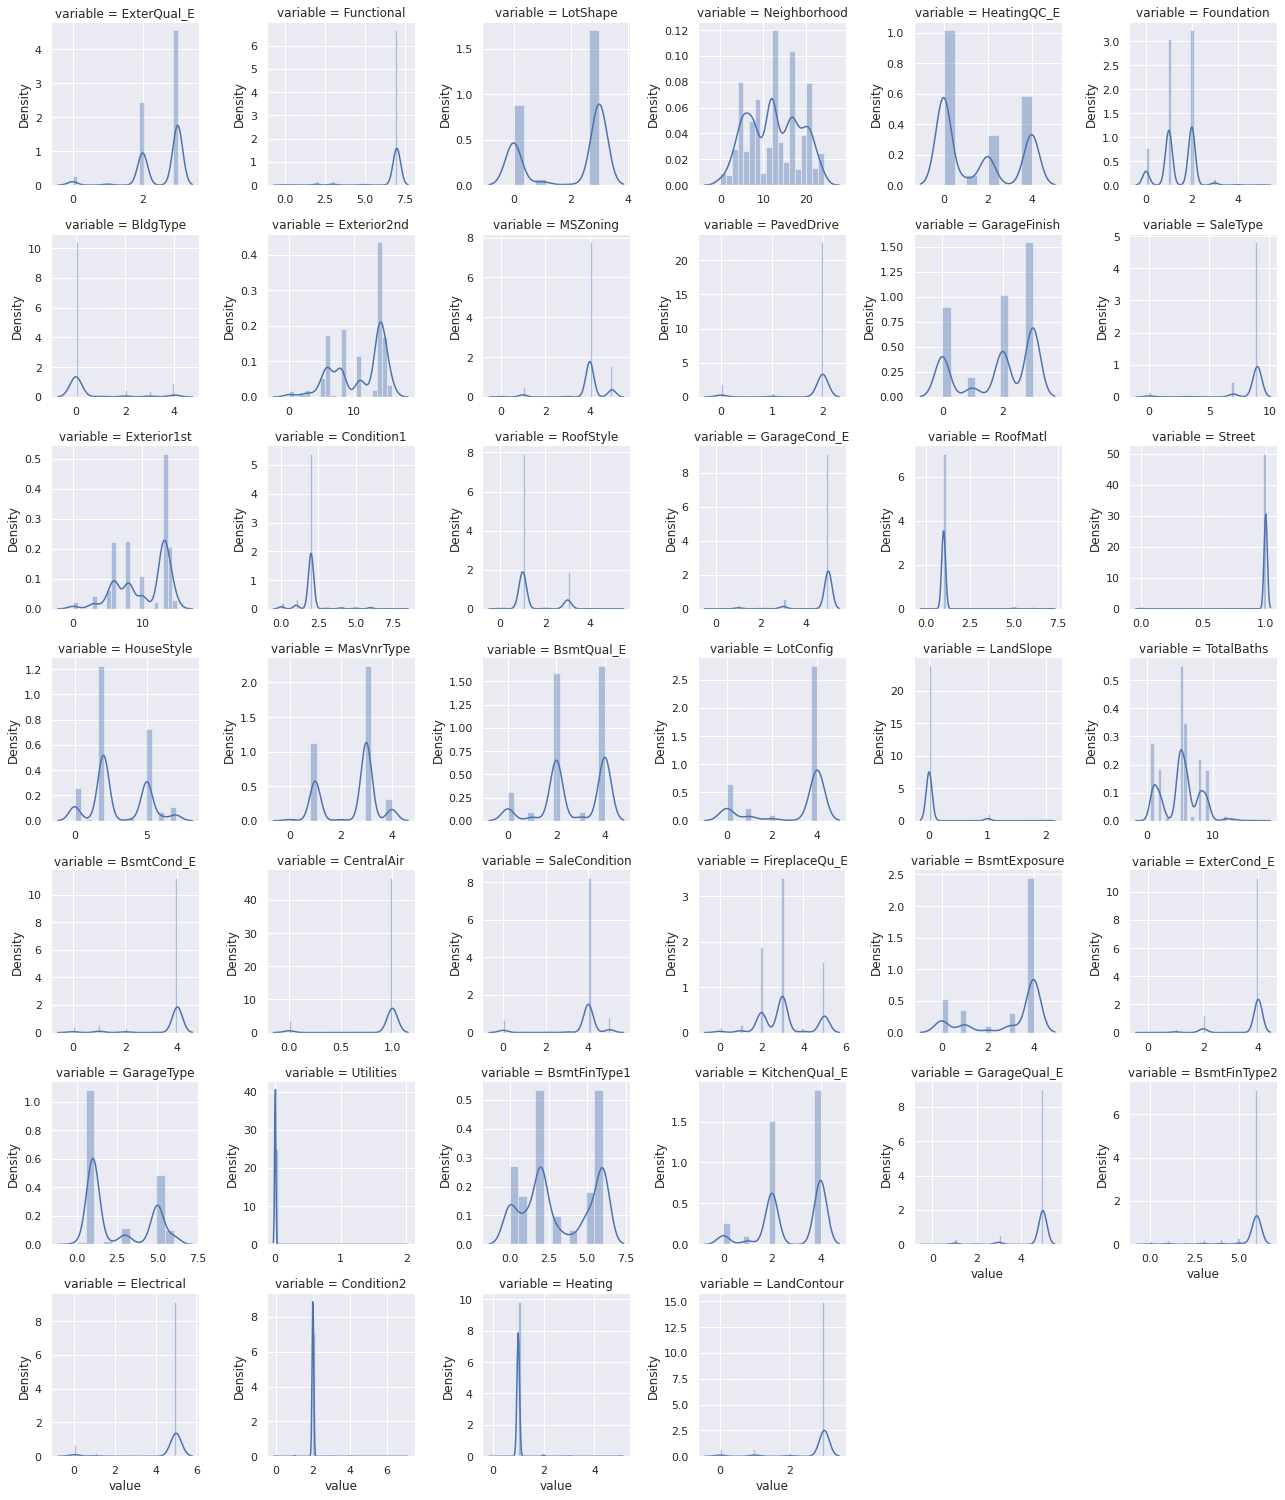

In [287]:
# Now that categorical variables are encoded, distribution plots can be made
f = pd.melt(df_train, value_vars=cat)
g = sns.FacetGrid(f, col="variable",  col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### Temporal Variable Analysis

In [288]:
#Temporal Variables
year_feature = [features for features in quantitative if 'Yr' in features or 'Year' in features]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

As houses get older their value declines. This could be due to structural depreciation or the internal house becoming outdated as styles change over the years. We can confirm this by plotting the year the house was built or remodeled and the year it was sold. 

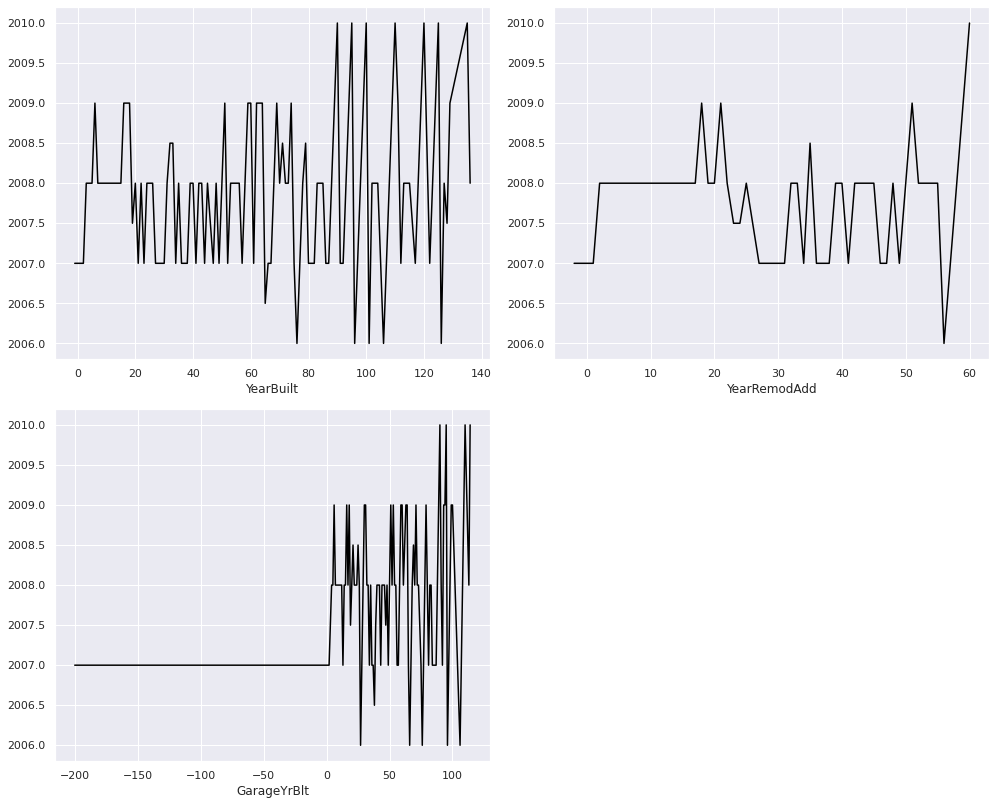

In [289]:
#Plot the difference between each Year Feature with YrSold

sns.set_style('darkgrid')
fig=plt.figure(figsize=(14,22))

a=len(year_feature)   # No. of rows in subplot
b=2                   # No. of plots in each row
c=1                   # Figure Counter

data=df_train.copy()  # Making a dataset copy

for features in year_feature:
    if features != 'YrSold':
        # Finding the difference between Year feature and Year Sold
        data[features] = data['YrSold'] - data[features]
        plt.subplot(a,b,c)
        data.groupby(features)['YrSold'].median().plot(color='black')
        c = c+1

fig.tight_layout()
plt.show()

### Correlations

In [290]:
df_test = df_train[df_train['Id'] > 1460]

In [291]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,TotalSF,Deck_PorchSF,QualxSF,ExterQual_E,ExterCond_E,BsmtQual_E,BsmtCond_E,HeatingQC_E,KitchenQual_E,FireplaceQu_E,GarageQual_E,GarageCond_E
0,1461,20,3,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,1,13,14,3,0.0,1,4,5,3,1,1,5,2,1,5,7,0,1,1961.0,3,1.0,730.0,2,0,0,6,2010,9,4,1,1778.0,260,8890.0,2.0,4.0,2.0,4.0,0.0,2.0,3.0,5.0,5.0
1,1462,20,4,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,1,14,15,1,108.0,1,4,0,6,1,1,5,3,1,6,7,0,1,1958.0,3,1.0,312.0,2,0,12500,6,2010,9,4,2,2658.0,429,15948.0,3.0,4.0,2.0,4.0,0.0,4.0,5.0,5.0,5.0
2,1463,60,4,74.0,13830,1,0,3,0,4,0,8,2,2,0,5,5,5,1997,1998,1,1,13,14,3,0.0,2,4,2,6,1,1,5,3,1,6,7,1,1,1997.0,0,2.0,482.0,2,0,0,3,2010,9,4,6,2557.0,246,12785.0,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0
3,1464,60,4,78.0,9978,1,0,3,0,4,0,8,2,2,0,5,6,6,1998,1998,1,1,13,14,1,20.0,2,4,2,6,1,1,5,3,1,7,7,1,1,1998.0,0,2.0,470.0,2,0,0,6,2010,9,4,6,2530.0,396,15180.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,5.0,5.0
4,1465,120,4,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,1,6,6,3,0.0,2,4,0,6,1,1,5,2,1,5,7,0,1,1992.0,2,2.0,506.0,2,0,0,1,2010,9,4,5,2560.0,226,20480.0,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0


In [292]:
df_train = df_train[df_train['Id'] < 1460]
df_train = df_train.join(house_train['SalePrice_Log'])

In [293]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBaths,TotalSF,Deck_PorchSF,QualxSF,ExterQual_E,ExterCond_E,BsmtQual_E,BsmtCond_E,HeatingQC_E,KitchenQual_E,FireplaceQu_E,GarageQual_E,GarageCond_E,SalePrice_Log
0,1,60,4,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,13,14,1,196.0,2,4,2,6,1,1,5,3,1,8,7,0,1,2003.0,2,2.0,548.0,2,0,0,2,2008,9,4,9,2566.0,61,17962.0,2.0,4.0,2.0,4.0,0.0,2.0,3.0,5.0,5.0,12.247694
1,2,20,4,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,1,1,0,6,1,1,5,3,1,6,7,1,1,1976.0,2,2.0,460.0,2,0,0,5,2007,9,4,6,2524.0,298,15144.0,3.0,4.0,2.0,4.0,0.0,4.0,5.0,5.0,5.0,12.109011
2,3,60,4,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,13,14,1,162.0,2,3,2,6,1,1,5,3,1,6,7,1,1,2001.0,2,2.0,608.0,2,0,0,9,2008,9,4,9,2706.0,42,18942.0,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0,12.317167
3,4,70,4,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,14,16,3,0.0,0,4,0,6,1,1,5,3,1,7,7,1,5,1998.0,3,3.0,642.0,2,0,0,2,2006,9,0,5,2473.0,307,17311.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,5.0,5.0,11.849398
4,5,60,4,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,13,14,1,350.0,2,0,2,6,1,1,5,4,1,9,7,1,1,2000.0,2,3.0,836.0,2,0,0,12,2008,9,4,9,3343.0,276,26744.0,2.0,4.0,2.0,4.0,0.0,2.0,5.0,5.0,5.0,12.429216


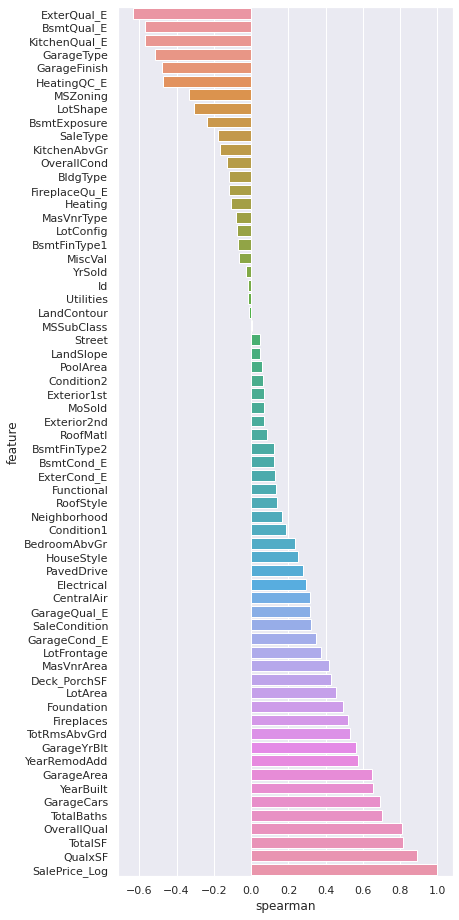

In [294]:
#Plot correlations between SalePrice and independent variables, while ignoring confounding variables
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice_Log'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6,0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = df_train.columns
spearman(df_train, features)

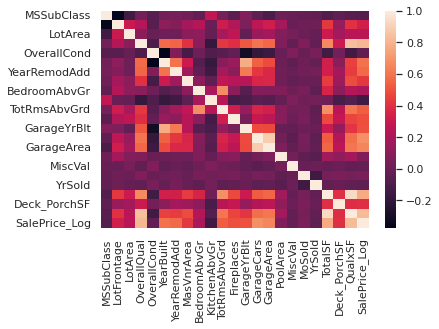

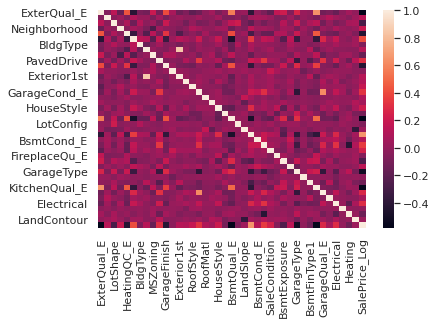

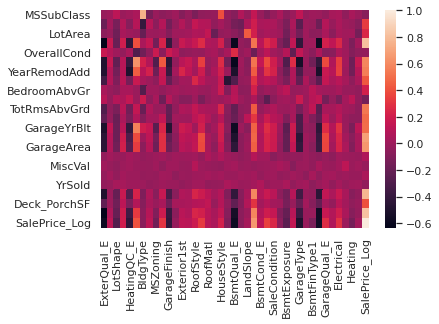

In [295]:
#Plot heatmaps to find correlations between variables (and any confounding variables)
plt.figure(1)
corr = df_train[quantitative+['SalePrice_Log']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = df_train[cat+['SalePrice_Log']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(cat)+1]), index=quantitative+['SalePrice_Log'], columns=cat+['SalePrice_Log'])
for q1 in quantitative+['SalePrice_Log']:
    for q2 in cat+['SalePrice_Log']:
        corr.loc[q1, q2] = df_train[q1].corr(df_train[q2])
sns.heatmap(corr)

GarageCars and GarageArea have a high correlation. GarageCars has a higher correlation with SalePrice, so GarageArea will be dropped. 

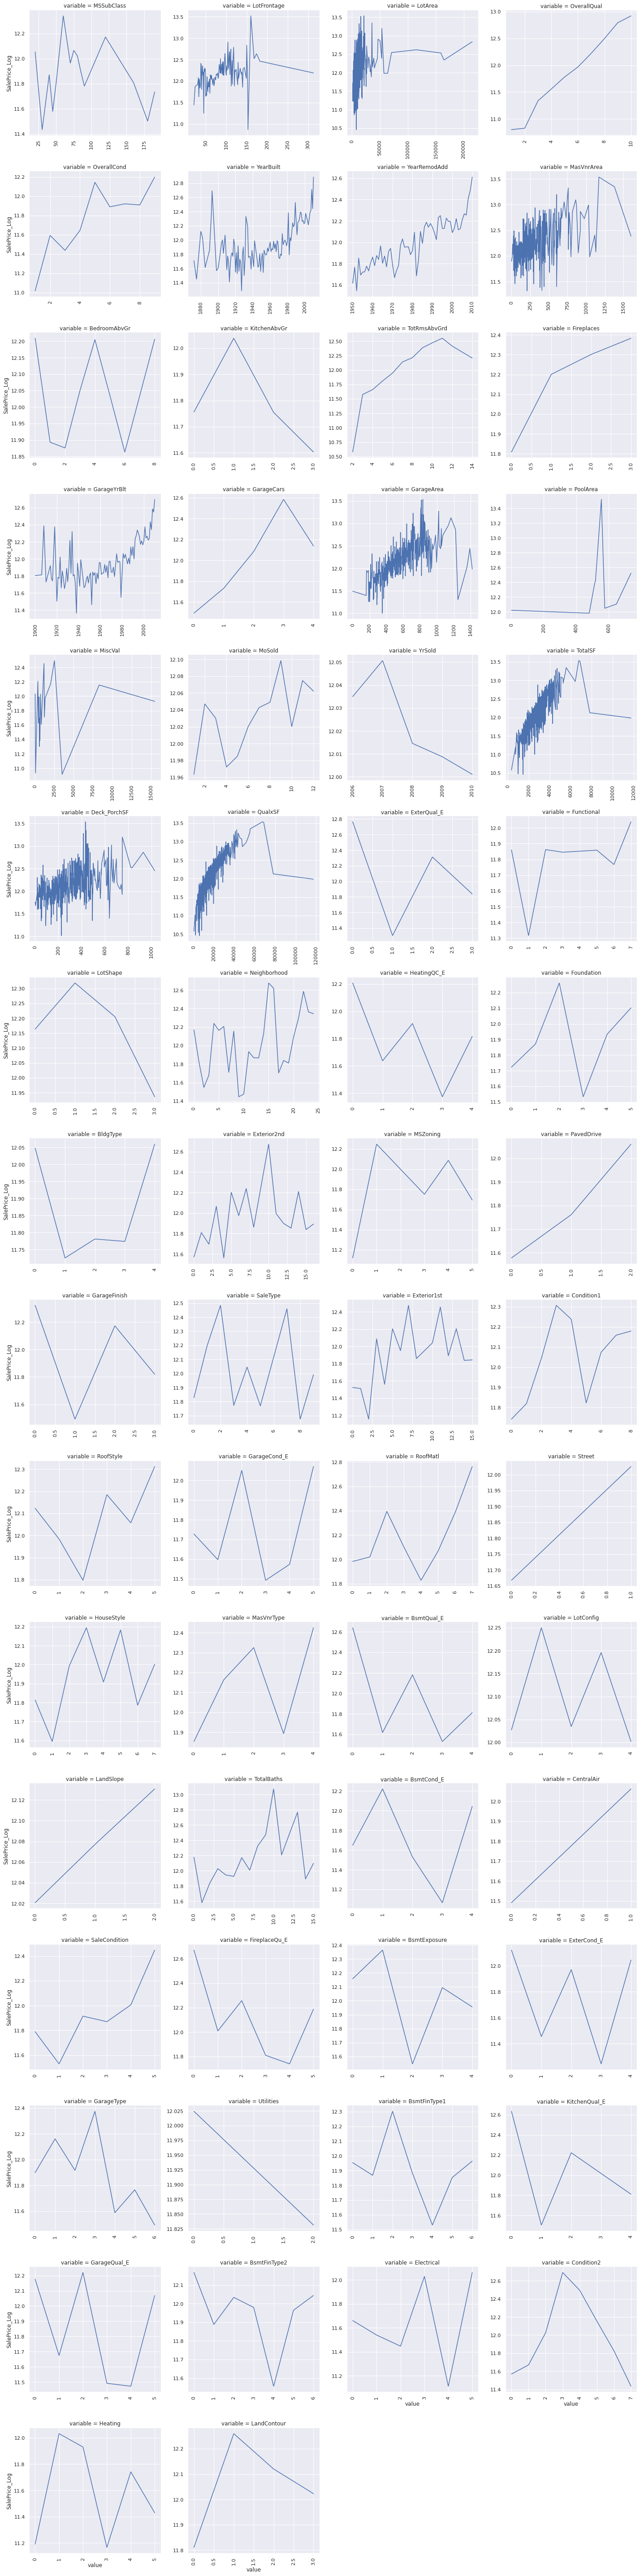

In [296]:
#Plot pairplots to determine how SalePrice changes with each independent variable
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df_train, id_vars=['SalePrice_Log'], value_vars=quantitative+cat)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "SalePrice_Log")

In [297]:
#Drop GarageArea column since it is highly correlated with GarageCars
df_train = df_train.drop(['GarageArea'], axis=1)

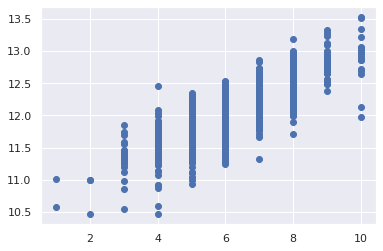

In [298]:
#Plot OverallQual vs SalePrice
plt.scatter(df_train['OverallQual'],df_train['SalePrice_Log'])

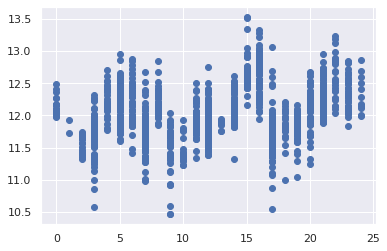

In [299]:
#Plot Neighborhood_E vs SalePrice
plt.scatter(df_train['Neighborhood'],df_train['SalePrice_Log'])

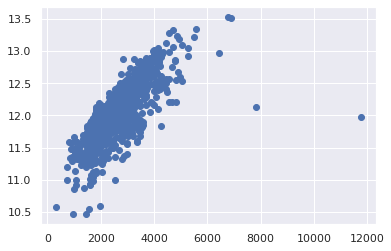

In [300]:
#Plot TotalSF vs SalePrice
plt.scatter(df_train['TotalSF'],df_train['SalePrice_Log'])

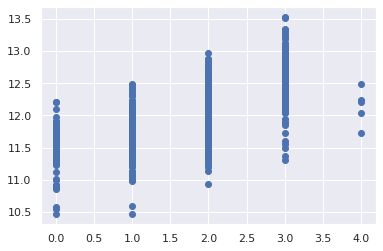

In [301]:
#Plot GarageCars vs SalePrice
plt.scatter(df_train['GarageCars'],df_train['SalePrice_Log'])

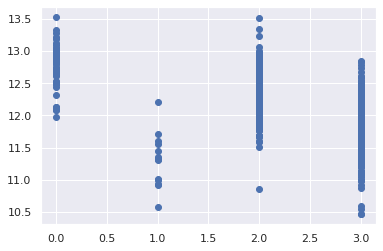

In [302]:
#Plot ExterQual_E vs SalePrice
plt.scatter(df_train['ExterQual_E'],df_train['SalePrice_Log'])

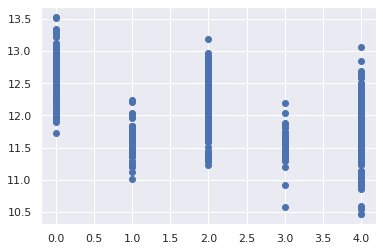

In [303]:
#Plot BsmtQual_E vs SalePrice
plt.scatter(df_train['BsmtQual_E'],df_train['SalePrice_Log'])

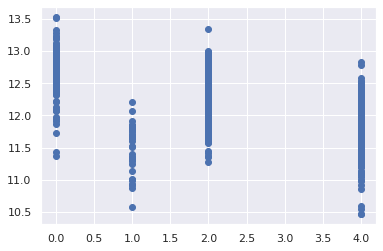

In [304]:
#Plot KitchenQual_E vs SalePrice
plt.scatter(df_train['KitchenQual_E'],df_train['SalePrice_Log'])

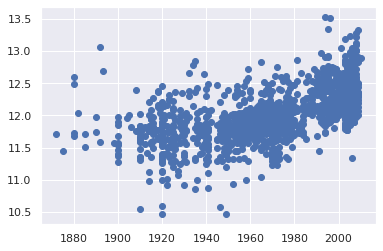

In [305]:
#Plot YearBuilt vs SalePrice
plt.scatter(df_train['YearBuilt'],df_train['SalePrice_Log'])

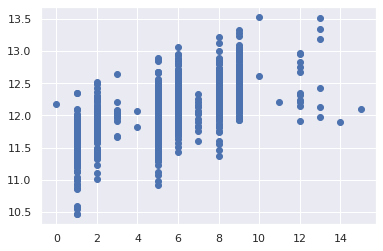

In [306]:
#Plot TotalBaths vs SalePrice
plt.scatter(df_train['TotalBaths'],df_train['SalePrice_Log'])

### Feature Variable Selection

In [307]:
#Correlation with target variable
min_cor = 0.5
cor = df_train.corr()
cor_target = abs(cor['SalePrice_Log'])
#Selecting highly correlated features to target variable
relevant_features = list(cor_target[cor_target.values > min_cor].index)

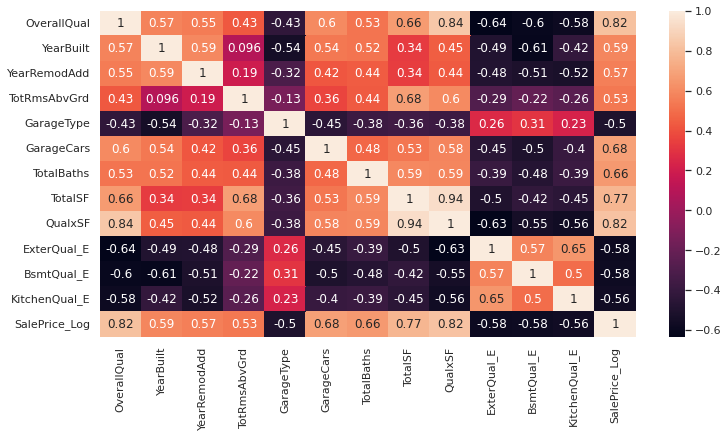

In [308]:
# Check the correlations between relevant features to confirm no confounding variables (>0.85 correlation)
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df_train[relevant_features].corr(), annot=True)
plt.show()

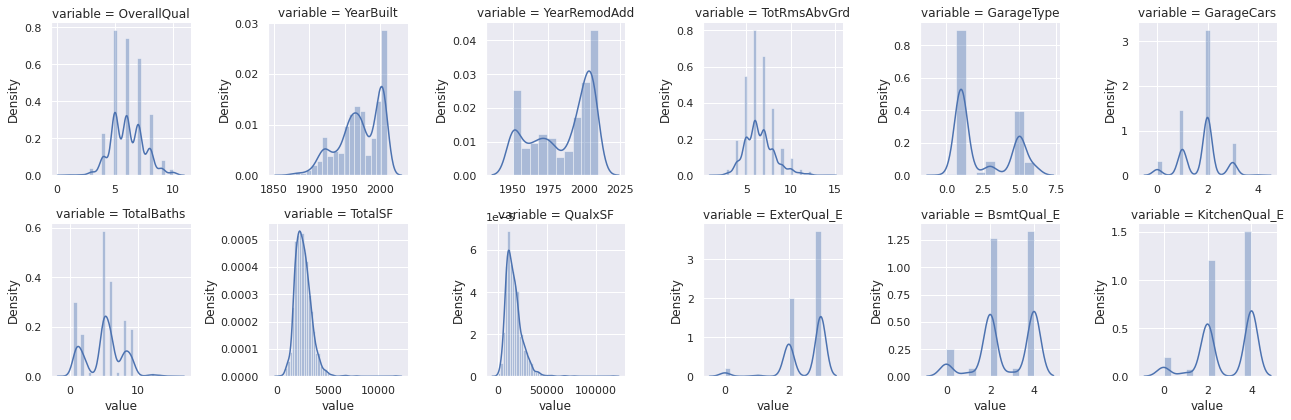

In [309]:
#Plot distributions of feature variables
top_features = relevant_features
top_features.remove('SalePrice_Log')

f = pd.melt(df_train, value_vars=top_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=6, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")            

In [310]:
top_features.append('Neighborhood')
top_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageType',
 'GarageCars',
 'TotalBaths',
 'TotalSF',
 'QualxSF',
 'ExterQual_E',
 'BsmtQual_E',
 'KitchenQual_E',
 'Neighborhood']

##Modeling

In [311]:
#Display top features to test
print(top_features)

# Split training data into train and test set
X = df_train[top_features]
y = df_train['SalePrice_Log']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageType', 'GarageCars', 'TotalBaths', 'TotalSF', 'QualxSF', 'ExterQual_E', 'BsmtQual_E', 'KitchenQual_E', 'Neighborhood']


###MinMax Scaler

In [312]:
# Scale using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform training data
X_train_transform = scaler.fit_transform(X_train)

# Transform test data (DO NOT FIT)
X_test_transform = scaler.transform(X_test)

In [313]:
def plot_predictions(y_true, y_pred):
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        R_SQR: {r2_score(y_true, y_pred)}
        EXV: {explained_variance_score(y_true, y_pred)}
        ME: {max_error(y_true, y_pred)}
        RMSLE: {mean_squared_log_error(y_true, y_pred)**0.5}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()
    
    errors = y_pred - y_true
    plt.subplots(figsize=(10, 6))
    sns.histplot(errors)
    plt.vlines(x = 0, ymin = 0, ymax = 14, color = 'red')
    plt.show()
    
    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by = 'y_true')
        )
    
    plt.subplots(figsize = (10, 6))
    sns.scatterplot(data=p_df, x = 'y_true', y = 'error')
    plt.hlines(y = 0, xmin = 10, xmax = 14, color = 'red')
    plt.show()

###Linear Regression

In [314]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_transform, y_train)

LinearRegression()

In [315]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_train_transform)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.163272360879886

In [316]:
y_pred = lin_reg.predict(X_test_transform)
results = pd.DataFrame({
    'prediction': y_pred, 
    'true_value': y_test ,
    'difference': y_test - y_pred,
})

results.head()

,prediction,true_value,difference
1321,11.064359,11.191342,0.126983
836,11.925992,11.941456,0.015463
413,11.621504,11.652687,0.031183
522,11.900861,11.976659,0.075799
1035,11.243441,11.338572,0.095132



        MSE: 0.02439643004141665
        RMSE: 0.1561935659411637
        MAE: 0.11591052513513567
        R_SQR: 0.8541766430636831
        EXV: 0.8549025463314526
        ME: 0.8484756692071294
        RMSLE: 0.012254960599586794
        
12.82900133265293 10.977300348160375


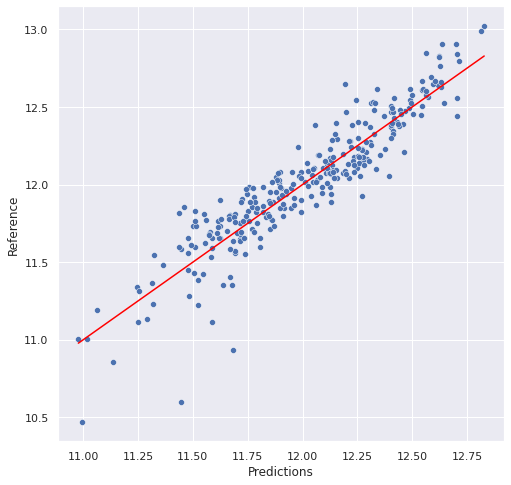

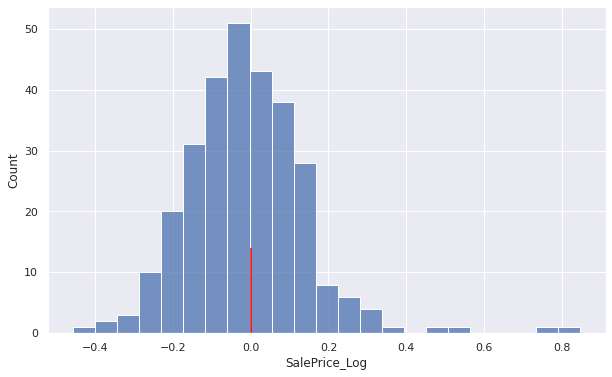

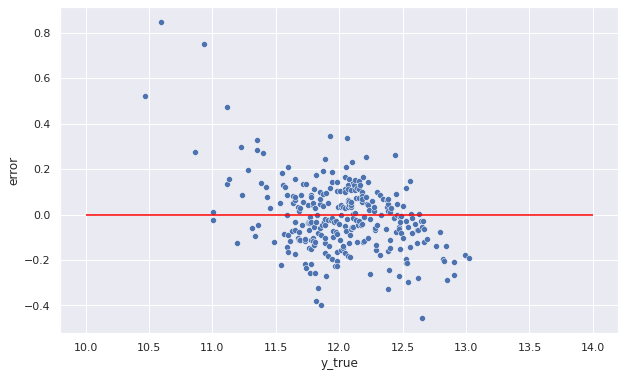

In [317]:
plot_predictions(y_test, y_pred)

###Decision Tree 

In [318]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_transform, y_train)

DecisionTreeRegressor()

In [319]:
y_pred = tree_reg.predict(X_train_transform)
tree_mse = mean_squared_error(y_train, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.004082263633728907

In [320]:
y_pred = tree_reg.predict(X_test_transform)
results = pd.DataFrame({
    'prediction': y_pred,
    'true_value': y_test,
    'difference': y_test - y_pred
})

results.head()

,prediction,true_value,difference
1321,11.607326,11.191342,-0.415984
836,11.824080,11.941456,0.117376
413,11.635143,11.652687,0.017544
522,12.254863,11.976659,-0.278203
1035,11.607326,11.338572,-0.268754



        MSE: 0.04301533664742065
        RMSE: 0.20740139017716505
        MAE: 0.14448601423263463
        R_SQR: 0.7428869396455182
        EXV: 0.7465217180180668
        ME: 1.1353763312812326
        RMSLE: 0.0163281516581185
        
13.021326833226556 10.47194980911048


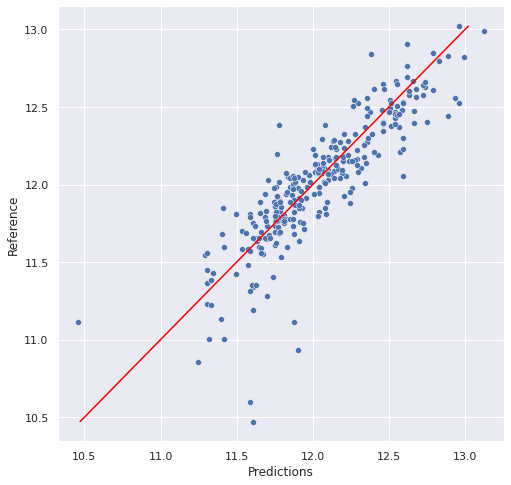

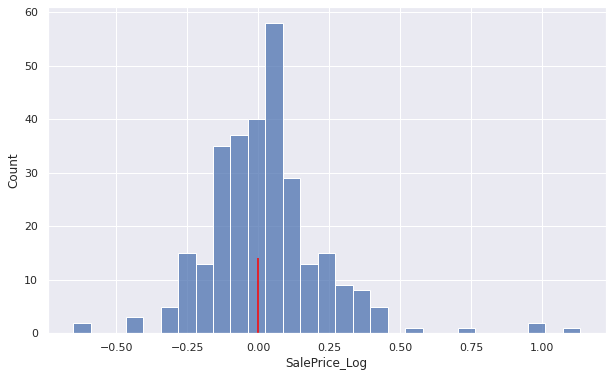

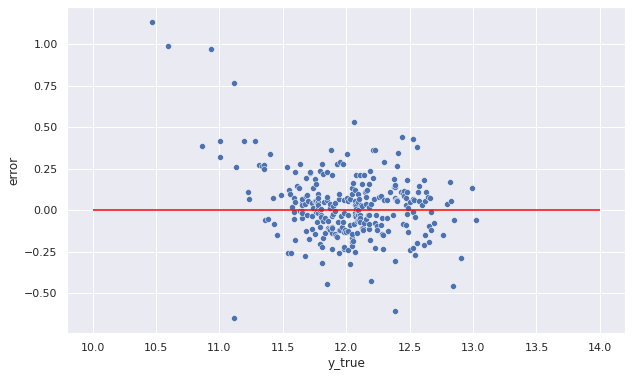

In [321]:
plot_predictions(y_test, y_pred)

###Random Forest

In [322]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_transform, y_train)
y_pred = forest_reg.predict(X_train_transform)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.05587783975863539

In [323]:
y_pred = forest_reg.predict(X_test_transform)
results = pd.DataFrame({
    'prediction': y_pred,
    'true_value': y_test,
    'difference': y_test - y_pred
})

results.head()

,prediction,true_value,difference
1321,11.431750,11.191342,-0.240408
836,11.865178,11.941456,0.076278
413,11.680464,11.652687,-0.027776
522,12.103955,11.976659,-0.127295
1035,11.482904,11.338572,-0.144332



        MSE: 0.025601470737577355
        RMSE: 0.1600045959889195
        MAE: 0.10799250901645284
        R_SQR: 0.846973823665078
        EXV: 0.8470217943146663
        ME: 0.9523562260544232
        RMSLE: 0.01263899300331864
        
13.021326833226556 10.936943445379143


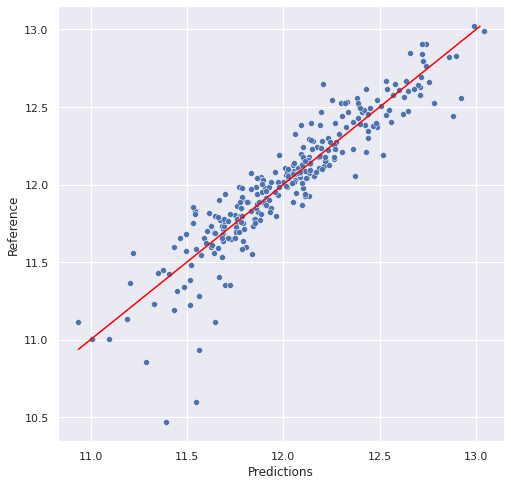

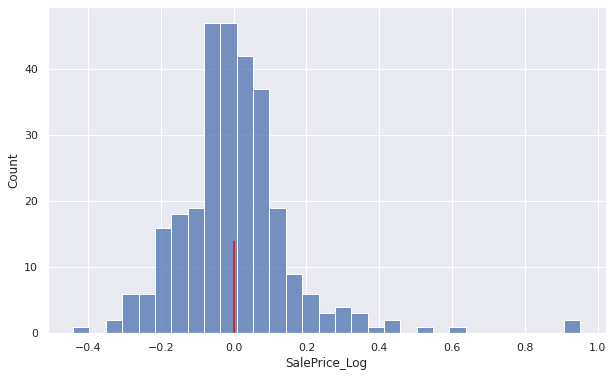

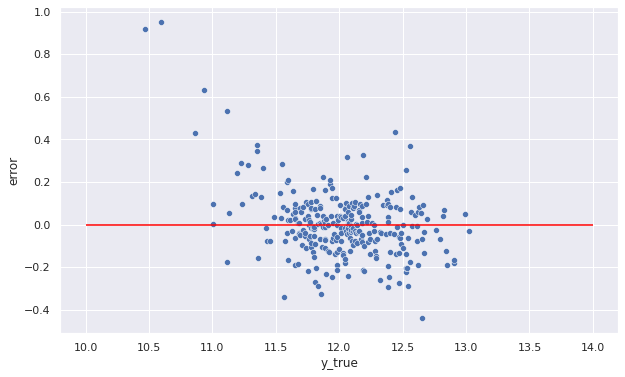

In [324]:
plot_predictions(y_test, y_pred)

###Lasso

In [325]:
from sklearn.model_selection import GridSearchCV

lasso_params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0]}

model = {'Lasso': GridSearchCV(Lasso(), 
                               param_grid=lasso_params).fit(X_train_transform, y_train).best_estimator_,
           }
model

{'Lasso': Lasso(alpha=0.001)}

In [326]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_transform, y_train)

Lasso(alpha=0.001)

In [327]:
y_pred = lasso.predict(X_train_transform)
lasso_mse = mean_squared_error(y_train, y_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

0.16721706324981536

In [328]:
y_pred = lasso.predict(X_test_transform)
results = pd.DataFrame({
    'prediction': y_pred,
    'true_value': y_test,
    'difference': y_test - y_pred
})

results.head()

,prediction,true_value,difference
1321,11.224566,11.191342,-0.033224
836,11.843696,11.941456,0.097760
413,11.618740,11.652687,0.033948
522,11.879410,11.976659,0.097249
1035,11.362260,11.338572,-0.023688



        MSE: 0.026143058378449793
        RMSE: 0.1616881516328571
        MAE: 0.11870678546682543
        R_SQR: 0.8437366234791014
        EXV: 0.844063806568347
        ME: 0.8617998167656751
        RMSLE: 0.012720048748712767
        
12.86922365979159 11.121217304160423


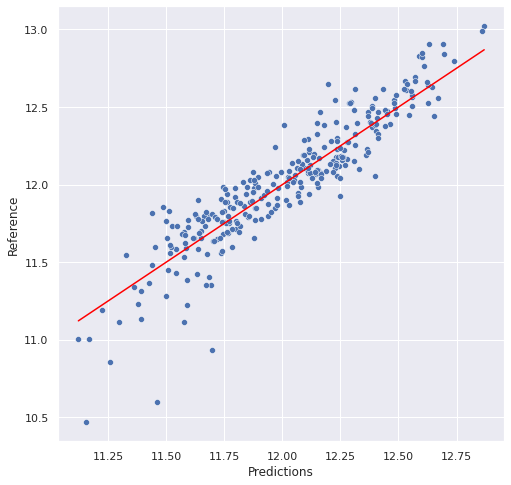

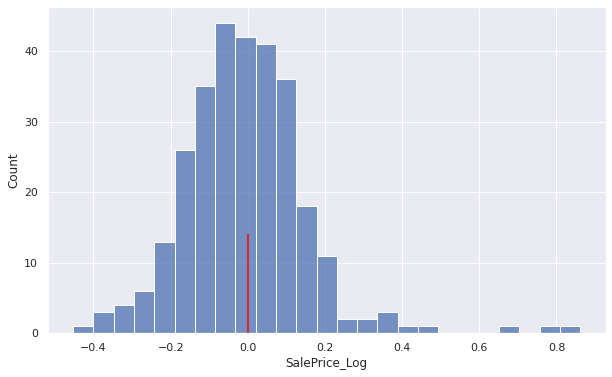

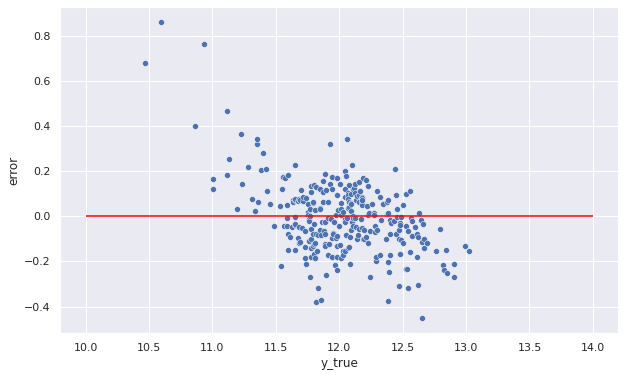

In [329]:
plot_predictions(y_test, y_pred)

###Ridge

In [330]:
ridge_params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0]}

model = {'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X_train_transform, y_train).best_estimator_,}
model

{'Ridge': Ridge()}

In [331]:
ridge_reg = Ridge(solver="cholesky")
ridge_reg.fit(X_train_transform, y_train)

Ridge(solver='cholesky')

In [332]:
y_pred = ridge_reg.predict(X_train_transform)
ridge_mse = mean_squared_error(y_train, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

0.1678234774202292

In [333]:
y_pred = ridge_reg.predict(X_test_transform)
results = pd.DataFrame({
    'prediction': y_pred,
    'true_value': y_test,
    'difference': y_test - y_pred
})

results.head()

,prediction,true_value,difference
1321,11.229624,11.191342,-0.038282
836,11.829494,11.941456,0.111962
413,11.609862,11.652687,0.042826
522,11.868844,11.976659,0.107816
1035,11.367564,11.338572,-0.028992



        MSE: 0.02645697472483319
        RMSE: 0.16265600119526236
        MAE: 0.11893427398266432
        R_SQR: 0.8418602696294153
        EXV: 0.8422039659254912
        ME: 0.8558824338807707
        RMSLE: 0.012796633068759814
        
12.892124373356586 11.131919824167442


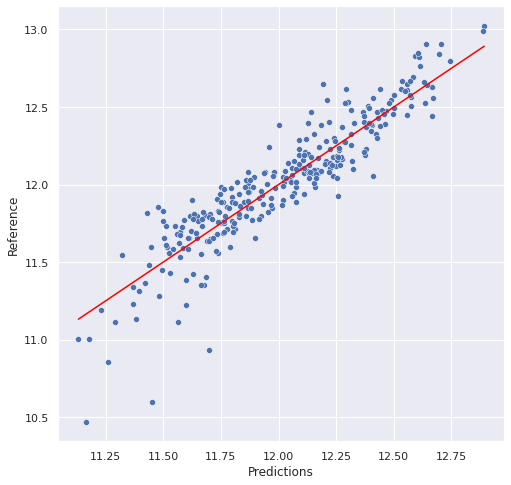

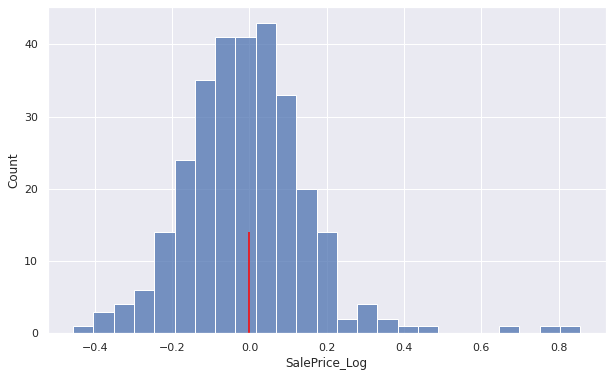

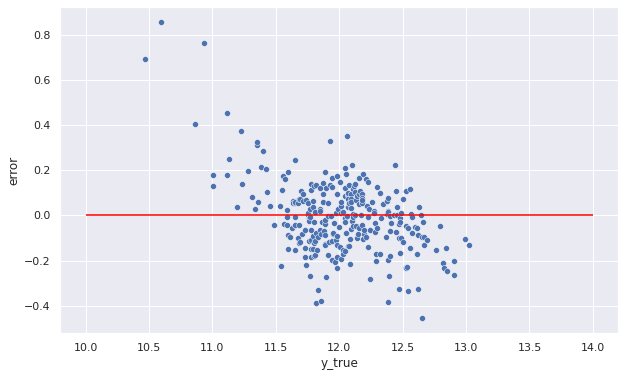

In [334]:
plot_predictions(y_test, y_pred)

###ElasticNet

In [335]:
from sklearn.linear_model import ElasticNetCV
alphas = [0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0]
ratios = np.arange(0, 1, 0.01)
enet_model = ElasticNetCV(alphas=alphas, l1_ratio=ratios, cv=5)
enet_model = enet_model.fit(X_train_transform, y_train)

optimal_alpha = enet_model.alpha_
optimal_ratio = enet_model.l1_ratio_

print(optimal_alpha)
print(optimal_ratio)

0.001
0.99


In [336]:
enet = ElasticNet(alpha=0.00001)
enet.fit(X_train_transform, y_train)

ElasticNet(alpha=1e-05)

In [337]:
y_pred = enet.predict(X_train_transform)
enet_mse = mean_squared_error(y_train, y_pred)
enet_rmse = np.sqrt(enet_mse)
enet_rmse

0.16329587617480795

In [338]:
y_pred = enet.predict(X_test_transform)
results = pd.DataFrame({
    'prediction': y_pred,
    'true_value': y_test,
    'difference': y_test - y_pred
})

results.head()

,prediction,true_value,difference
1321,11.075716,11.191342,0.115626
836,11.920207,11.941456,0.021249
413,11.620970,11.652687,0.031717
522,11.899077,11.976659,0.077583
1035,11.251686,11.338572,0.086886



        MSE: 0.02439105335594804
        RMSE: 0.1561763533827962
        MAE: 0.11571267669185975
        R_SQR: 0.8542087808118247
        EXV: 0.8549044250259075
        ME: 0.8490147078911185
        RMSLE: 0.012256270462912179
        
12.833482543111211 10.991167811277645


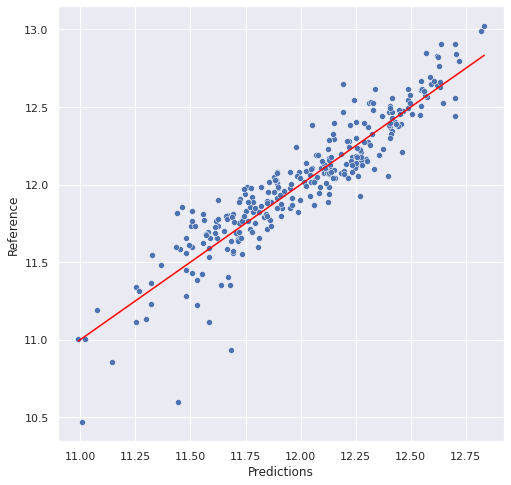

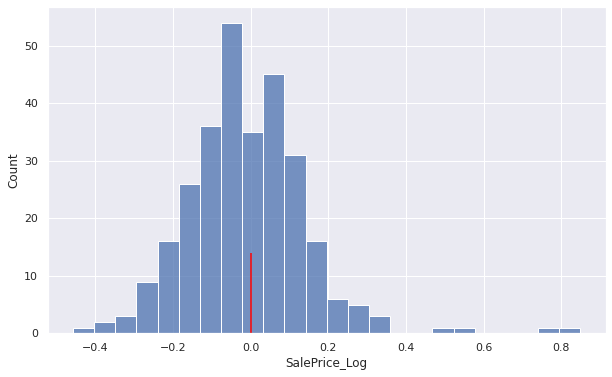

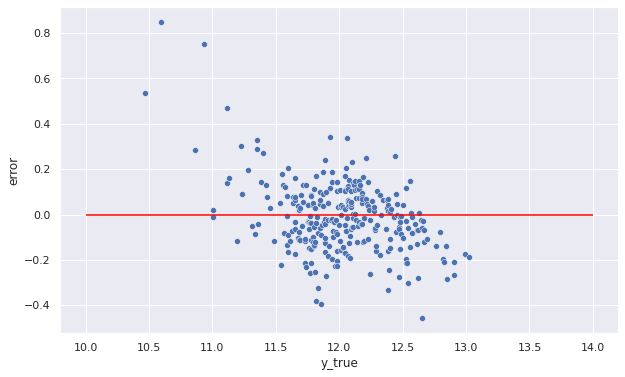

In [339]:
plot_predictions(y_test, y_pred)

###CV

In [340]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [341]:
lin_scores = cross_val_score(lin_reg, X_train_transform, y_train,
                              scoring="neg_mean_squared_error", cv=5)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.18264104 0.26396277 0.16280963 0.15408063 0.13974821]
Mean: 0.18064845652811706
Standard deviation: 0.04391389040969646


In [342]:
tree_scores = cross_val_score(tree_reg, X_train_transform, y_train,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [0.24912592 0.24572093 0.20961675 0.20011187 0.21387456]
Mean: 0.22369000638744363
Standard deviation: 0.019913189521681262


In [343]:
forest_scores = cross_val_score(forest_reg, X_train_transform, y_train,
                              scoring="neg_mean_squared_error", cv=5)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.16496602 0.20019268 0.1404764  0.14081927 0.13244116]
Mean: 0.15577910690045363
Standard deviation: 0.024736994213362475


In [344]:
lasso_scores = cross_val_score(lasso, X_train_transform, y_train,
                              scoring="neg_mean_squared_error", cv=5)

lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Scores: [0.17601209 0.23399313 0.16471005 0.15643544 0.14297887]
Mean: 0.17482591813935006
Standard deviation: 0.03148631842468575


In [345]:
ridge_scores = cross_val_score(ridge_reg, X_train_transform, y_train,
                              scoring="neg_mean_squared_error", cv=5)

ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [0.17512283 0.23720443 0.16411608 0.15815864 0.14318381]
Mean: 0.17555715880049189
Standard deviation: 0.03250296971204233


In [346]:
enet_scores = cross_val_score(enet, X_train_transform, y_train,
                              scoring="neg_mean_squared_error", cv=5)

enet_rmse_scores = np.sqrt(-enet_scores)
display_scores(enet_rmse_scores)

Scores: [0.18149708 0.26358122 0.16249844 0.15387529 0.13957306]
Mean: 0.1802050185427682
Standard deviation: 0.043842886921459316


###Model Selection

In [347]:
X_train = df_train[top_features]
y_train = df_train['SalePrice_Log']

X_test = df_test[top_features]

In [348]:
# Scale using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform training data
X_train_transform = scaler.fit_transform(X_train)

# Transform test data (DO NOT FIT)
X_test_transform = scaler.transform(X_test)

In [349]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

enet = ElasticNet()

grid_search = GridSearchCV(enet, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_transform, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [350]:
grid_search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 10}

In [351]:
grid_search.best_estimator_

ElasticNet(alpha=0.0001, l1_ratio=0.0, max_iter=10)

In [352]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

0.2089022868573229 {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 1}
0.17370563365757813 {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 5}
0.16878218016717367 {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 10}
0.20892282415699506 {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 1}
0.17368564168917686 {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 5}
0.16878675843582006 {'alpha': 0.0001, 'l1_ratio': 0.1, 'max_iter': 10}
0.2089434387917413 {'alpha': 0.0001, 'l1_ratio': 0.2, 'max_iter': 1}
0.17366577579319473 {'alpha': 0.0001, 'l1_ratio': 0.2, 'max_iter': 5}
0.1687913123702025 {'alpha': 0.0001, 'l1_ratio': 0.2, 'max_iter': 10}
0.20896413106014977 {'alpha': 0.0001, 'l1_ratio': 0.30000000000000004, 'max_iter': 1}
0.1736460068397481 {'alpha': 0.0001, 'l1_ratio': 0.30000000000000004, 'max_iter': 5}
0.16879622036218722 {'alpha': 0.0001, 'l1_ratio': 0.30000000000000004, 'max_iter': 10}
0.20898490126558325 {'alpha': 0.0001, 'l1_ratio': 0.4, 'max_iter': 1}
0.17362630552328145 {'alpha': 0.0001, 'l1_

In [353]:
ID = df_test['Id']
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_transform)

#final_mse = mean_squared_error(y_test, final_predictions)
#final_rmse = np.sqrt(final_mse)
y_pred = np.exp(final_model.predict(X_test_transform)).round(2)
submit_test1 = pd.concat([ID,pd.DataFrame(y_pred)],axis=1)
submit_test1.columns = ['Id','SalePrice']
submit_test1.head()

,Id,SalePrice
0,1461,115818.73
1,1462,141883.34
2,1463,169805.63
3,1464,182340.50
4,1465,210782.46


In [354]:
# Submitting the output
submit_test1.to_csv('hp_submission.csv',index=False)

##Conclusion

The top features after completing an EDA on the training set were OverallQual, YearBuilt, YearRemodAdd, TotRmsAbvGrd, GarageType, GarageCars,
TotalBaths, TotalSF, QualxSF, ExterQual_E, BsmtQual_E, KitchenQual_E, and Neighborhood. By combing the total square footage and total baths, I was able to create 2 new features which were ultimately highly correlated with SalePrice. OverallQual and TotalSF were multiplied to get a higher correlated feature than each alone. Neighborhood had a low correlation to saleprice in this EDA, but a previous EDA with different transformation showed a high correlation. Neighborhood was therefore included in the final model. 


After testing multiple models, it was determined that elasticnet would be the best model for this data. Cross validation was completed for each model, and elasticnet optimization was performed using GridSearch to get the best parameters for the data. It is recommended that for future home inquiries, this model can be used to predict house prices. 